# Leitura e Modelagem dos dados

In [1]:
import pandas as pd

# Leitura do arquivo CSV
dados = pd.read_csv('exames.csv')

dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
# Porcentagem dos dados que temos entre M e B
dados['diagnostico'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnostico, dtype: float64

In [3]:
# Verificação dos valores que estão Null e onde estão
dados.isnull().sum()

# Coluna do exame 33 está praticamente sem dados

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

# Teste com todos os dados do DataFrame

## Separação dos dados de treino e de teste

In [4]:
# Valores que vão ser analisados para se chegar a uma conclusão
# Eliminação da coluna id que é irrelevante
# Eliminação da coluna exame 33 que é quase toda vazia 
x = dados.drop(columns=['id', 'diagnostico', 'exame_33'], axis=1)

# A conclusão
y = dados['diagnostico']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Definição da SEED para evitar a aleatoriedade dos testes
SEED = 10
np.random.seed(SEED)

# Separação dos dados de treino e de teste, com proporcionalidade no y
# 75% para treino e 25% para teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)

print("Treinaremos com {} elementos e testaremos com {} elementos".format(len(treino_x), len(teste_x)))

Treinaremos com 426 elementos e testaremos com 143 elementos


## Classificadores Bobos

### Cálculo do valor de Baseline

In [6]:
from sklearn.dummy import DummyClassifier

# Uso da estratégia da proporcionalidade
dummy_stratified = DummyClassifier(strategy='stratified')

dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto do dummy_stratified foi {:.2f}%".format(taxa_acerto))

A taxa de acerto do dummy_stratified foi 49.65%


In [7]:
from sklearn.dummy import DummyClassifier

# Uso da estratégia do mais frequente
dummy_most_frequent = DummyClassifier(strategy='most_frequent')

dummy_most_frequent.fit(treino_x, treino_y)
previsoes = dummy_most_frequent.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto do dummy_most_frequent foi {:.2f}%".format(taxa_acerto))

A taxa de acerto do dummy_most_frequent foi 62.94%


## Avaliação de Classificadores 

### Random Forest Classifier

In [8]:
%%time
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(treino_x, treino_y)

taxa_acerto = model.score(teste_x, teste_y)

print("A taxa de acerto do RandomForestClassifier foi {:.2f}%".format(taxa_acerto*100))

A taxa de acerto do RandomForestClassifier foi 95.80%
Wall time: 1.33 s


### MultinomialNB

In [9]:
%%time
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(treino_x, treino_y)

taxa_acerto = model.score(teste_x, teste_y)

print("A taxa de acerto do MultinomialNB foi {:.2f}%".format(taxa_acerto*100))

A taxa de acerto do MultinomialNB foi 90.21%
Wall time: 735 ms


### SVC

In [10]:
%%time
from sklearn.svm import SVC

model = SVC()
model.fit(treino_x, treino_y)

taxa_acerto = model.score(teste_x, teste_y)

print("A taxa de acerto do SVC foi {:.2f}%".format(taxa_acerto*100))

A taxa de acerto do SVC foi 91.61%
Wall time: 17 ms


# Vizualização dos dados do DataFrame para análise

## Primeiros tratamentos dos dados originais

In [11]:
# Modelagem dos dados que já tinham sido usados para o treino,
# para voltar ao formato original da DataFrame inicial
# dados_plot1 = pd.concat([y, x], axis=1)
dados_plot1 = pd.concat([y, x.iloc[:,0:10]], axis=1)

dados_plot1.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [12]:
# União dos dados em uma categoria EXAMES para plotar as informações no gráfico
dados_plot1 = pd.melt(dados_plot1, 
                     id_vars='diagnostico', # variavel de identificação
                     var_name='exames', # variaveis que vão ser unificadas
                     value_name='valores') # nome da coluna que vai ficar os dados de variavel unificada

dados_plot1.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


In [13]:
dados_plot1.value_counts()

diagnostico  exames    valores 
B            exame_4   103.7800    357
M            exame_4   103.7800    212
B            exame_8   0.0000       13
             exame_9   0.0000       13
             exame_10  0.1601        4
                                  ... 
M            exame_1   20.2600       1
                       20.2000       1
                       20.1600       1
                       20.1300       1
B            exame_1   6.9810        1
Length: 4705, dtype: int64

### Apresentação do primeiro gráfico

<AxesSubplot:xlabel='exames', ylabel='valores'>

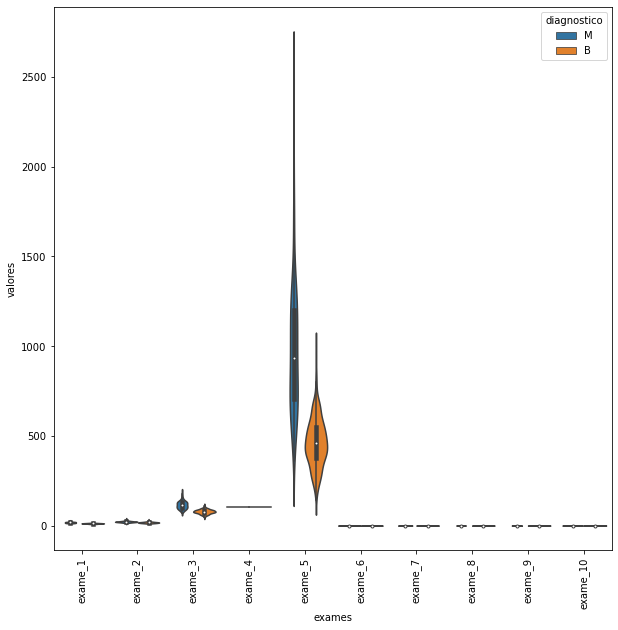

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações para deixar o gráfico mais apresentável
plt.figure(figsize=(10, 10)) # Definição do tamanho
plt.xticks(rotation=90) # Orientação da legenda do eixo X

# Plotagem dos dados
sns.violinplot(x='exames', 
               y='valores', 
               hue='diagnostico',
               data=dados_plot1)

##### Problema na escala dos dados do eixo Y, é necessário padronizar dentro de um limite

### Correções da apresentação do gráfico

#### Nova escala para os valores

In [15]:
from sklearn.preprocessing import StandardScaler

# É feita uma nova escalação dos dados dos valores
scaler = StandardScaler()
scaler.fit(x)
dados_scaler = scaler.transform(x)

dados_scaler

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
# Como não podemos trabalhar com um array do Numpy
# Tranformamos em um DataFrame novamente
dados_scaler = pd.DataFrame(data = dados_scaler,
                            columns=x.keys())

dados_scaler

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.0,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.0,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.0,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.0,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.0,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.0,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.0,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.0,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.0,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.0,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,1.0,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.0,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.0,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.0,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,1.0,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.0,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.0,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.0,2.289985,1.919083,2.219635


#### Apresentação do gráfico geral com as correções

<AxesSubplot:xlabel='exames', ylabel='valores'>

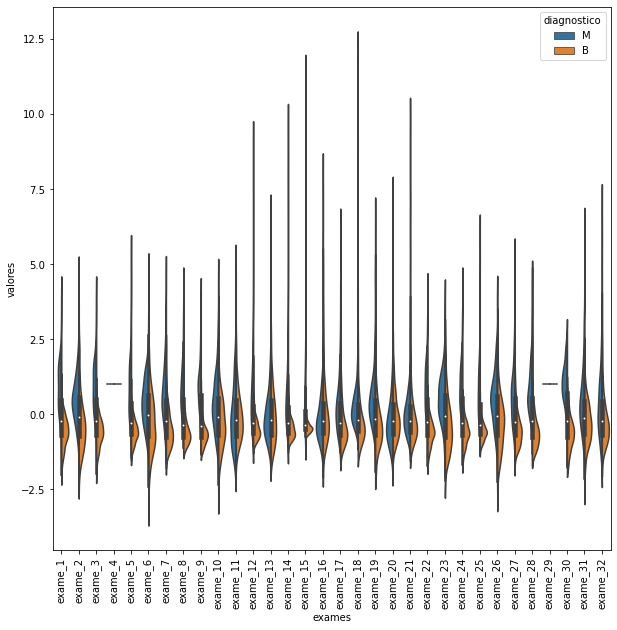

In [17]:
# Modelagem dos dados que já tinham sido usados para o treino,
# para voltar ao formato original da DataFrame inicial
# dados_plot = pd.concat([y, x], axis=1)
dados_plot = pd.concat([y, dados_scaler.iloc[:,0:32]], axis=1)

# União dos dados em uma categoria EXAMES para plotar as informações no gráfico
dados_plot = pd.melt(dados_plot, 
                     id_vars='diagnostico', # variavel de identificação
                     var_name='exames', # variaveis que vão ser unificadas
                     value_name='valores') # nome da coluna que vai ficar os dados de variavel unificada

# Configurações para deixar o gráfico mais apresentável
plt.figure(figsize=(10, 10)) # Definição do tamanho
plt.xticks(rotation=90) # Orientação da legenda do eixo X

# Plotagem dos dados
sns.violinplot(x='exames', 
               y='valores', 
               hue='diagnostico',
               split=True,
               data=dados_plot)

In [18]:
# Função para mostrar secções mais detalhadas do gráfico
def grafico_violino(valores, start, end):
    dados_plot = pd.concat([y, valores.iloc[:,start:end]], axis=1)

    # União dos dados em uma categoria EXAMES para plotar as informações no gráfico
    dados_plot = pd.melt(dados_plot, 
                         id_vars='diagnostico', # variavel de identificação
                         var_name='exames', # variaveis que vão ser unificadas
                         value_name='valores') # nome da coluna que vai ficar os dados de variavel unificada

    # Configurações para deixar o gráfico mais apresentável
    plt.figure(figsize=(10, 10)) # Definição do tamanho
    plt.xticks(rotation=90) # Orientação da legenda do eixo X

    # Plotagem dos dados
    sns.violinplot(x='exames', 
                   y='valores', 
                   hue='diagnostico',
                   split=True,
                   data=dados_plot)

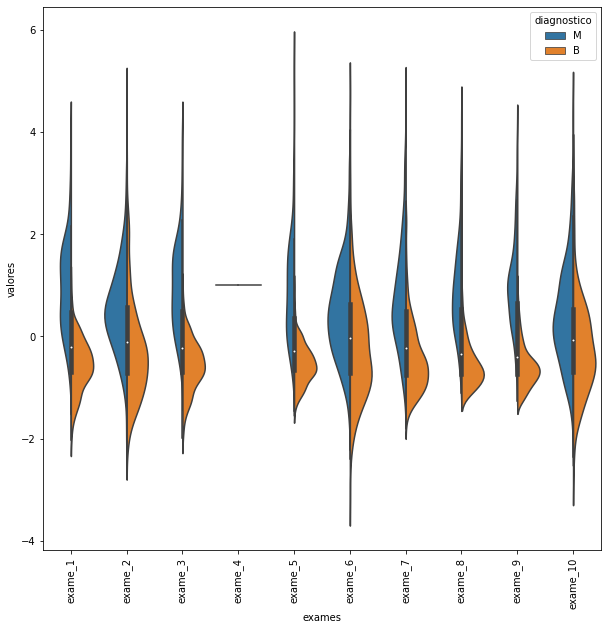

In [19]:
grafico_violino(dados_scaler, 0, 10)

###### O exame 4 é uma constante e por isso pode ser retirado, pois não vai fazer muita diferença

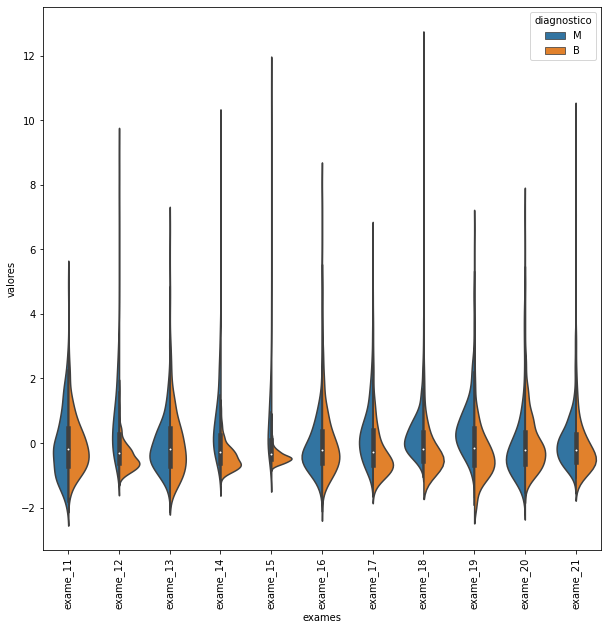

In [20]:
grafico_violino(dados_scaler, 10, 21)

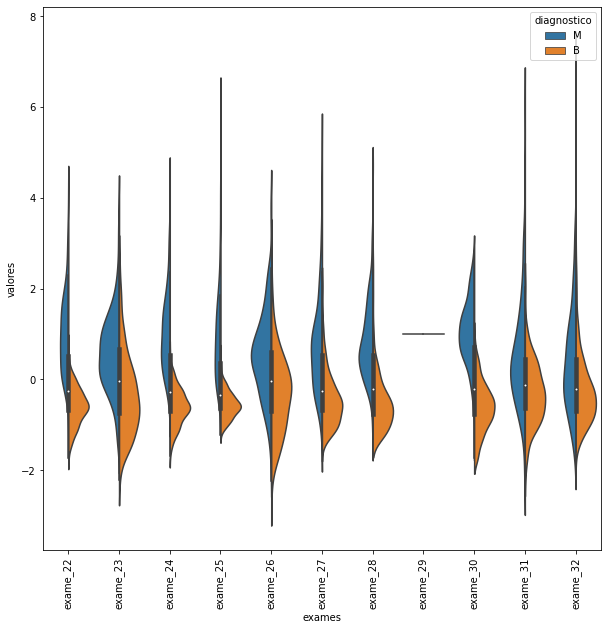

In [21]:
grafico_violino(dados_scaler, 21, 32)

###### O exame 29 é uma constante e por isso pode ser retirado, pois não vai fazer muita diferença

### Remoção dos Dados irrelevantes e Novo teste

In [22]:
# Remoção das colunas 'exame_4' e 'exame_29', pois eram constantes
dados_v3 = dados_scaler.drop(columns=['exame_4', 'exame_29'])

dados_v3.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### Como o Random Forest Classifier foi o melhor, vai ser usado para os testes futuros

In [23]:
# Função para fazer a classificação
# Recebe o x como parâmentro
def classificar(valores):
    # Definição da SEED para evitar a aleatoriedade dos testes
    SEED = 10
    np.random.seed(SEED)

    # Separação dos dados de treino e de teste, com proporcionalidade no y
    # 75% para treino e 25% para teste
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, y,
                                                            test_size=0.25,
                                                            stratify=y)

    model = RandomForestClassifier()
    model.fit(treino_x, treino_y)

    taxa_acerto = model.score(teste_x, teste_y)

    print("A taxa de acerto do RandomForestClassifier foi {:.2f}%".format(taxa_acerto*100))

#### A classificação para o novo X foi melhor que a anterior, foram removidos os exames 4 e 29

In [24]:
classificar(dados_v3)

A taxa de acerto do RandomForestClassifier foi 96.50%


### Estudo de dados altamente correlacionados

In [25]:
# Matriz de correlação do novo X
matriz_correlacao = dados_v3.corr()

dados_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


#### Mapa de Calor para identificação das variáveis mais correlacionadas

<AxesSubplot:>

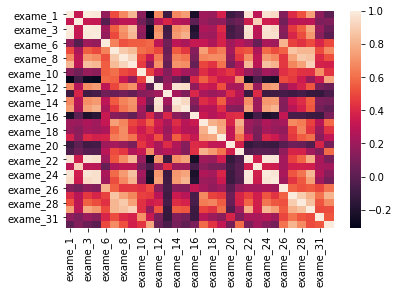

In [26]:
# Mapa de calor da Matriz de correlação
sns.heatmap(matriz_correlacao)

<AxesSubplot:>

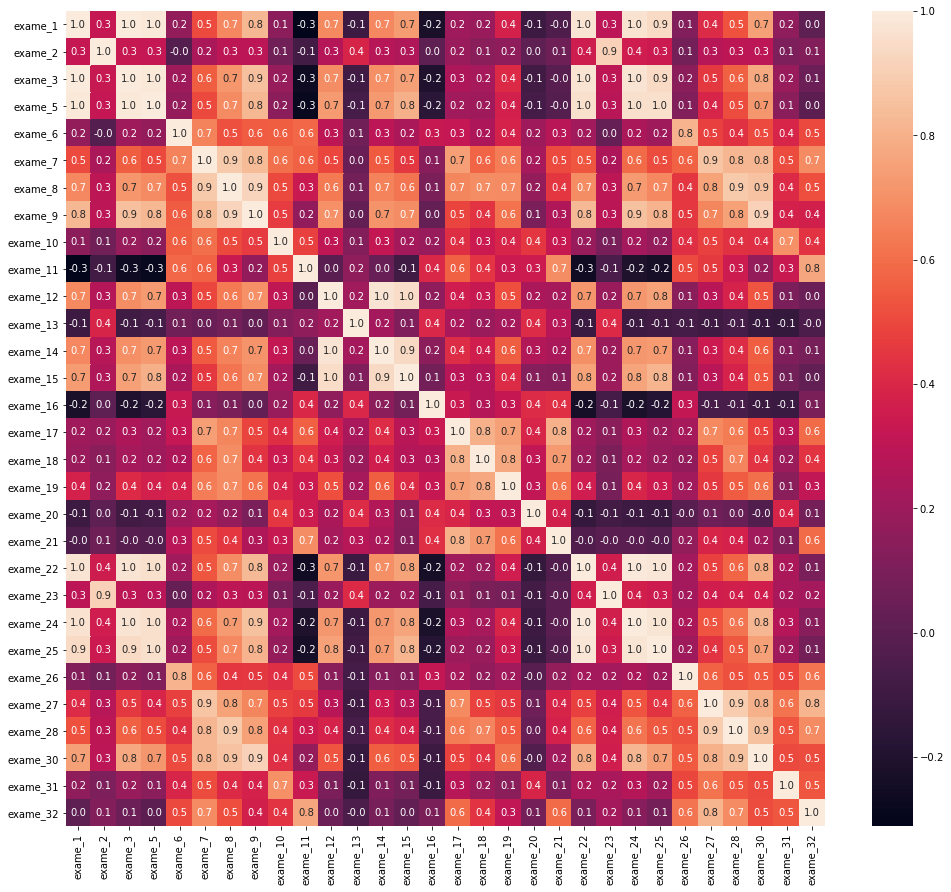

In [27]:
# Mudança no Plot do gráfico para melhor vizualização
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')

In [28]:
# Variáveis altamente correlacionadas
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]

matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Identificação de onde estão os valores
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

matriz_correlacao_v1.sum()

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [30]:
# Identificação de quais exames devem ser removidos do DataFrame
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]

variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

##### Escolhido os exames 3 e 24 para remoção, pois apenas 1 dos dados correlacionados deve ser apagado

#### Remoção dos dados altamente correlacionados, pois não agregam muito

In [31]:
dados_v4 = dados_v3.drop(columns=['exame_3', 'exame_24'])

dados_v4.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### Classificação igual a anterior, só que conseguimos remover dois dados que não importavam muito

In [32]:
classificar(dados_v4)

A taxa de acerto do RandomForestClassifier foi 96.50%


#### Teste com a remoção de todas os dados correlacionados

In [33]:
dados_v5 = dados_v3.drop(columns=['exame_1', 'exame_3', 'exame_22', 'exame_24'])

dados_v5.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [34]:
classificar(dados_v5)

A taxa de acerto do RandomForestClassifier foi 97.90%


## Uso do método K-best para seleção automática das features mais relevantes

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Uso da função chi2 e das 5 melhores features do DataFrame
k_best = SelectKBest(chi2, k = 15)

k_best

SelectKBest(k=15, score_func=<function chi2 at 0x00000229F8E43550>)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Uso da função chi2 e das 5 melhores features do DataFrame
k_best = SelectKBest(chi2, k = 5)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, 
                                                        y,
                                                        test_size=0.25,
                                                        stratify=y)

# Adaptação do K-best aos dados que temos
k_best.fit(treino_x, treino_y)

# Transformação dos dados de treino e de teste
treino_k_best = k_best.transform(treino_x)
teste_k_best = k_best.transform(teste_x)

# Treinamento usando os dados selecionados pelo K_Best
model = RandomForestClassifier()
model.fit(treino_k_best, treino_y)

taxa_acerto = model.score(teste_k_best, teste_y)

#### Adaptação dos dados para usar o método do K-best

In [36]:
# Definição da SEED para evitar a aleatoriedade dos testes
SEED = 10
np.random.seed(SEED)

# É necessário remover os dados que foram encontrados como irrelevantes antes
# pois o método de seleção do K-best não funciona com valores negativos, os
# quais apareceram devido ao escalonamento dos dados
x_novo = x.drop(columns=['exame_3', 'exame_4', 'exame_24', 'exame_29'])

# Separação dos dados de treino e de teste, com proporcionalidade no y
# 75% para treino e 25% para teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x_novo, y,
                                                        test_size=0.25,
                                                        stratify=y)
# Adaptação do K-best aos dados que temos
k_best.fit(treino_x, treino_y)

# Transformação dos dados de treino e de teste
treino_k_best = k_best.transform(treino_x)
teste_k_best = k_best.transform(teste_x)

In [37]:
treino_k_best

array([[1.277e+01, 2.943e+01, 5.079e+02, ..., 1.064e-01, 8.653e-02,
        6.498e-02],
       [1.270e+01, 1.217e+01, 4.950e+02, ..., 1.607e-01, 9.385e-02,
        8.224e-02],
       [9.755e+00, 2.820e+01, 2.909e+02, ..., 1.109e-01, 7.190e-02,
        4.866e-02],
       ...,
       [1.222e+01, 2.004e+01, 4.531e+02, ..., 2.315e-01, 3.535e-01,
        8.088e-02],
       [1.225e+01, 1.794e+01, 4.603e+02, ..., 1.788e-01, 1.943e-01,
        8.211e-02],
       [2.018e+01, 2.397e+01, 1.245e+03, ..., 6.164e-01, 7.681e-01,
        2.508e-01]])

#### Resultado do treino usando o número de K-best features selecionadas

In [38]:
model = RandomForestClassifier()
model.fit(treino_k_best, treino_y)

taxa_acerto = model.score(teste_k_best, teste_y)

print("A taxa de acerto do RandomForestClassifier foi {:.2f}%".format(taxa_acerto*100))

A taxa de acerto do RandomForestClassifier foi 96.50%


#### Estudo do como estão os acertos e erros

In [39]:
from sklearn.metrics import confusion_matrix

# Dados que foram previstos pelo modelo usando o método K-best
previsoes = model.predict(teste_k_best)

# Matriz para saber quantos acertos e erros de cada tipo
matriz_confusao = confusion_matrix(teste_y, previsoes)

matriz_confusao

array([[86,  4],
       [ 1, 52]], dtype=int64)

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

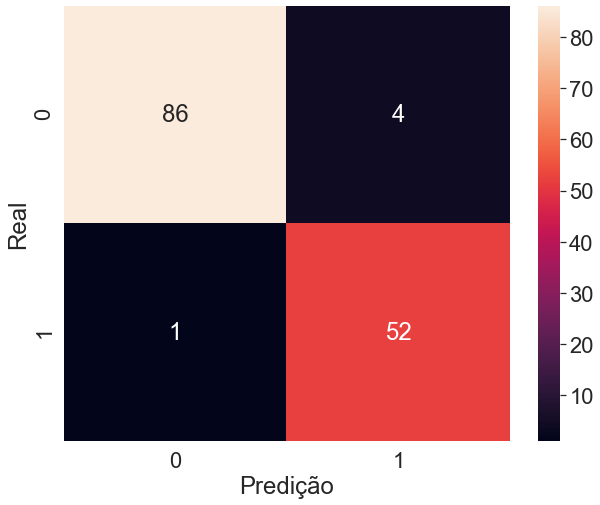

In [40]:
# Melhor vizualização dos dados
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

## Uso do método RFE para seleção de features

In [41]:
from sklearn.feature_selection import RFE

SEED = 10
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_novo, y,
                                                        test_size=0.25,
                                                        stratify=y)

model = RandomForestClassifier()
model.fit(treino_x, treino_y)

select_rfe = RFE(estimator=model, n_features_to_select=15, step=1)
select_rfe.fit(treino_x, treino_y)

treino_rfe = select_rfe.transform(treino_x)
teste_rfe = select_rfe.transform(teste_x)

model.fit(treino_rfe, treino_y)

taxa_acerto = model.score(teste_rfe, teste_y)

print("A taxa de acerto do RandomForestClassifier foi {:.2f}%".format(taxa_acerto*100))

A taxa de acerto do RandomForestClassifier foi 96.50%


In [42]:
previsoes = model.predict(teste_rfe)

# Matriz para saber quantos acertos e erros de cada tipo
matriz_confusao = confusion_matrix(teste_y, previsoes)

matriz_confusao

array([[86,  4],
       [ 1, 52]], dtype=int64)

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

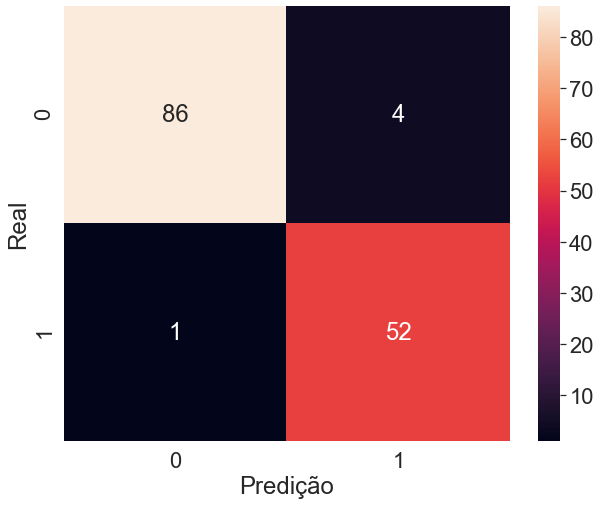

In [43]:
# Melhor vizualização dos dados
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

### Uso do RFECV (Cross Validation)

In [44]:
from sklearn.feature_selection import RFECV

SEED = 10
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_novo, y,
                                                        test_size=0.25,
                                                        stratify=y)

model = RandomForestClassifier()
model.fit(treino_x, treino_y)

select_rfecv = RFECV(estimator=model, cv=10, step=1, scoring='accuracy')
select_rfecv.fit(treino_x, treino_y)

treino_rfecv = select_rfecv.transform(treino_x)
teste_rfecv = select_rfecv.transform(teste_x)

model.fit(treino_rfecv, treino_y)

taxa_acerto = model.score(teste_rfecv, teste_y)

print("A taxa de acerto do RandomForestClassifier foi {:.2f}%".format(taxa_acerto*100))

A taxa de acerto do RandomForestClassifier foi 97.90%


In [45]:
previsoes = model.predict(teste_rfecv)

# Matriz para saber quantos acertos e erros de cada tipo
matriz_confusao = confusion_matrix(teste_y, previsoes)

matriz_confusao

array([[88,  2],
       [ 1, 52]], dtype=int64)

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

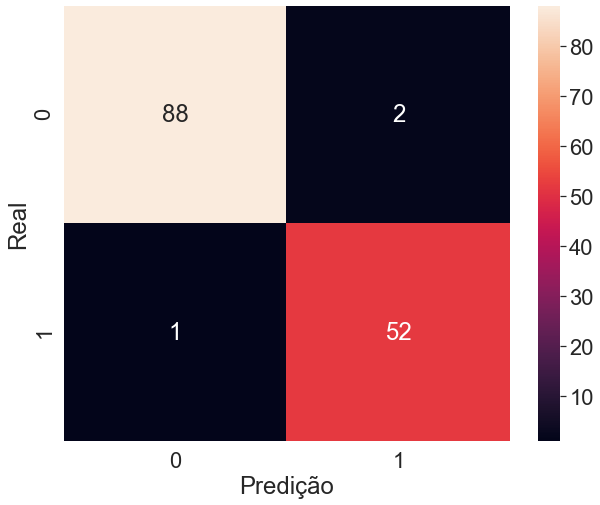

In [46]:
# Melhor vizualização dos dados
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

In [47]:
# Número de Features utilizadas para chegar a esse resultado
select_rfecv.n_features_

16

In [48]:
# Vizualização das features que foram escolhidas para chegar a esse resultado
treino_x.columns[select_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_7', 'exame_8', 'exame_9',
       'exame_12', 'exame_15', 'exame_22', 'exame_23', 'exame_25', 'exame_26',
       'exame_27', 'exame_28', 'exame_30', 'exame_31'],
      dtype='object')

In [49]:
# Pontuação de cada feature escolhida
select_rfecv.grid_scores_

array([0.88732004, 0.93887043, 0.95055371, 0.95055371, 0.94584718,
       0.9482835 , 0.95066445, 0.95769657, 0.95287929, 0.95996678,
       0.96229236, 0.96229236, 0.96937984, 0.9624031 , 0.96699889,
       0.9717608 , 0.9624031 , 0.96467331, 0.96002215, 0.96467331,
       0.96229236, 0.96229236, 0.96699889, 0.96234773, 0.95991141,
       0.96234773, 0.96467331, 0.96234773])

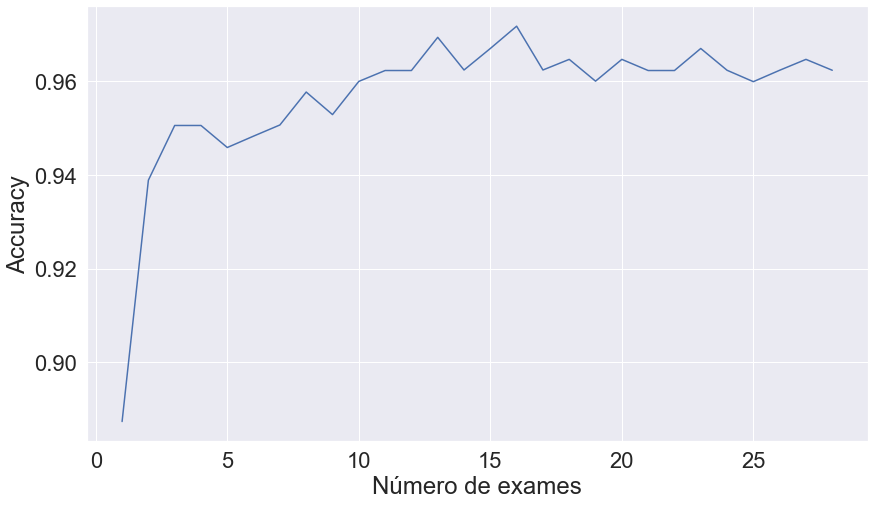

In [50]:
plt.figure(figsize=(14,8))
plt.xlabel('Número de exames')
plt.ylabel('Accuracy')
plt.plot(range(1, len(select_rfecv.grid_scores_) + 1), select_rfecv.grid_scores_)
plt.show()

### Demonstração dos dados em um plano

In [51]:
SEED = 10
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_novo, y,
                                                        test_size=0.25,
                                                        stratify=y)

model = RandomForestClassifier()
model.fit(treino_x, treino_y)

# Por isso vamos utilizar só 2 features para demonstrar
select_rfe = RFE(estimator=model, n_features_to_select=2, step=1)
select_rfe.fit(treino_x, treino_y)

treino_rfe = select_rfe.transform(treino_x)
teste_rfe = select_rfe.transform(teste_x)

model.fit(treino_rfe, treino_y)

taxa_acerto = model.score(teste_rfe, teste_y)

print("A taxa de acerto do RandomForestClassifier foi {:.2f}%".format(taxa_acerto*100))

A taxa de acerto do RandomForestClassifier foi 94.41%


In [52]:
# Nova variável para mostrar os dados no plano
valores_v7 = select_rfe.transform(x_novo)

valores_v7.shape

(569, 2)

In [53]:
valores_v7

array([[2.019e+03, 2.654e-01],
       [1.956e+03, 1.860e-01],
       [1.709e+03, 2.430e-01],
       ...,
       [1.124e+03, 1.418e-01],
       [1.821e+03, 2.650e-01],
       [2.686e+02, 0.000e+00]])

In [54]:
# Os exames escolhidos como os 2 melhores
treino_x.columns[select_rfe.support_]

Index(['exame_25', 'exame_30'], dtype='object')

<AxesSubplot:>

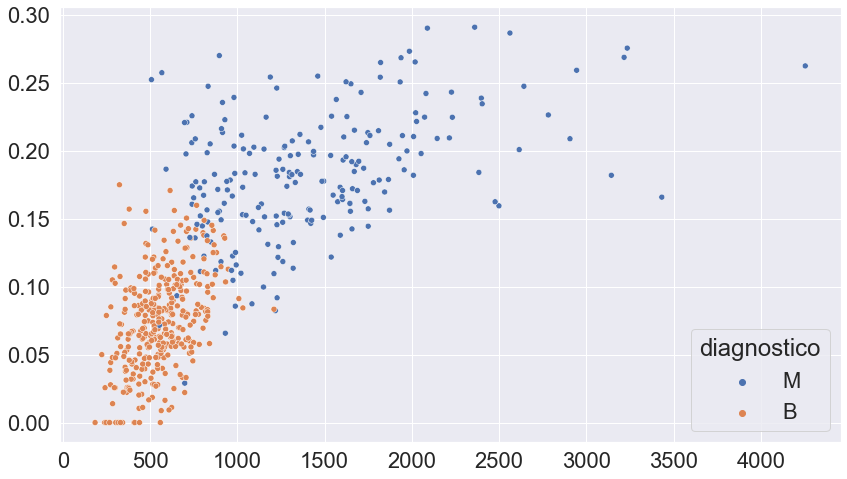

In [55]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_v7[:,0], y=valores_v7[:,1], hue=y)

## Uso do PCA e TSNE para preservação dos principais dados 

### Demonstração do PCA

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

### valores_v8 = pca.fit_transform(x_novo) # Uso do PCA com valores não normalizados é pior
valores_v8 = pca.fit_transform(dados_scaler)

valores_v8

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

<AxesSubplot:>

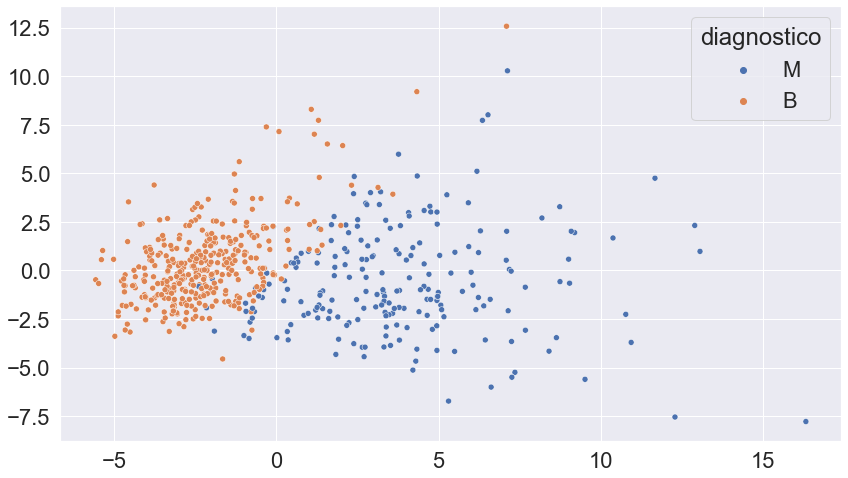

In [57]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_v8[:,0], y=valores_v8[:,1], hue=y)

### Demonstração do TSNE

In [58]:
from sklearn.manifold import TSNE

# Reduz para 2 componentes para plotar o gráfico em duas dimensões
tsne = TSNE(n_components=2)
valores_v9 = tsne.fit_transform(dados_scaler)

valores_v9

array([[ -0.26121488,  29.686403  ],
       [-12.402888  ,  18.037384  ],
       [ -4.9037166 ,  26.724863  ],
       ...,
       [ -9.0136    ,  10.989782  ],
       [ -2.6593275 ,  29.594278  ],
       [ -2.911466  , -26.837442  ]], dtype=float32)

<AxesSubplot:>

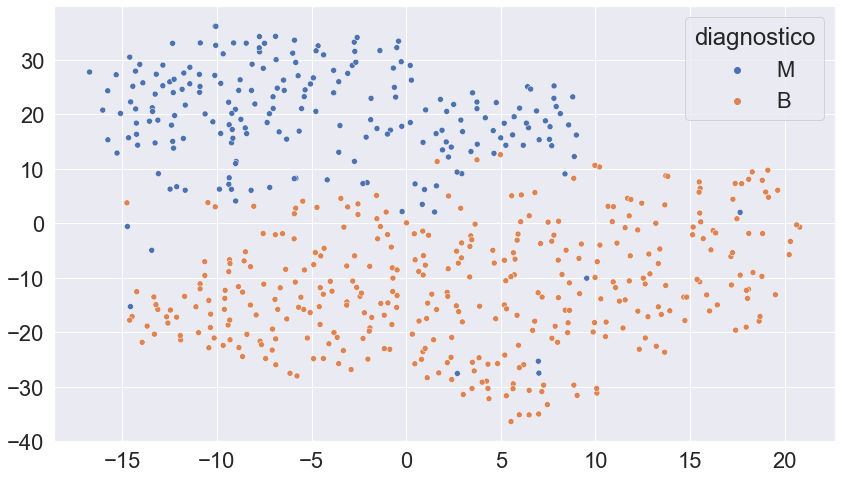

In [59]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_v9[:,0], y=valores_v9[:,1], hue=y)

##### Em resumo, as pessoas na fronteira apresentam um resultado "mais perigoso" e por isso devem ser solicitadas a fazerem novos exames para uma melhor certeza do resultado, devido a redução do número de exames que conseguimos fazer